In [1]:
# Лабораторная работа №1
import pandas as pd

df = pd.read_csv("C:/Users/ekrosz/Desktop/Лабы/car_sales.csv", sep = ',', encoding = "utf-8")

print(df.dtypes)

car_id           object
date             object
customer_name    object
gender           object
annual_income     int64
dealer_name      object
company          object
model            object
engine           object
transmission     object
color            object
price             int64
dealer_Number    object
body_style       object
phone             int64
dealer_region    object
dtype: object


In [2]:
print("Предварительный осмотр данных:\n")
print(df.info())
print(df.describe())
print(df.head())

Предварительный осмотр данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_id         23906 non-null  object
 1   date           23906 non-null  object
 2   customer_name  23905 non-null  object
 3   gender         23906 non-null  object
 4   annual_income  23906 non-null  int64 
 5   dealer_name    23906 non-null  object
 6   company        23906 non-null  object
 7   model          23906 non-null  object
 8   engine         23906 non-null  object
 9   transmission   23906 non-null  object
 10  color          23906 non-null  object
 11  price          23906 non-null  int64 
 12  dealer_Number  23906 non-null  object
 13  body_style     23906 non-null  object
 14  phone          23906 non-null  int64 
 15  dealer_region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None
       annual_income         

In [3]:
print("Пропуски в данных:")
print(df.isnull().sum())

print("\nДубликаты в данных:")
print(df.duplicated().sum())

Пропуски в данных:
car_id           0
date             0
customer_name    1
gender           0
annual_income    0
dealer_name      0
company          0
model            0
engine           0
transmission     0
color            0
price            0
dealer_Number    0
body_style       0
phone            0
dealer_region    0
dtype: int64

Дубликаты в данных:
0


In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
car_id           0
date             0
customer_name    0
gender           0
annual_income    0
dealer_name      0
company          0
model            0
engine           0
transmission     0
color            0
price            0
dealer_Number    0
body_style       0
phone            0
dealer_region    0
dtype: int64


In [5]:
category_fuature_names = ["gender", "engine", "transmission", "body_style"]
number_feature_names = ["annual_income", "price"]
other_feature_names = ["date", "model", "color", "company", "dealer_region"]

features = df[category_fuature_names + number_feature_names + other_feature_names]

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

scaler_minmax = preprocessing.MinMaxScaler()
minmax_values = scaler_minmax.fit_transform(features[number_feature_names])
minmax_columns = []
for i in number_feature_names: minmax_columns.append(i + "_norm")
minmax_values_df = pd.DataFrame(minmax_values, columns=minmax_columns)

scaler_standard = preprocessing.StandardScaler()
standard_values = scaler_standard.fit_transform(features[number_feature_names])
standard_columns = []
for i in number_feature_names: standard_columns.append(i + "_stand")
standard_values_df = pd.DataFrame(standard_values, columns=standard_columns)

encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_values = encoder.fit_transform(features[category_fuature_names])
encoded_columns = encoder.get_feature_names_out(category_fuature_names)
encoded_values_df = pd.DataFrame(encoded_values, columns=encoded_columns)

features = pd.concat([features, minmax_values_df, standard_values_df, encoded_values_df], axis = 1)
features.dropna(inplace=True)

features

,gender,engine,transmission,body_style,annual_income,price,date,model,color,company,...,price_norm,annual_income_stand,price_stand,gender_Male,engine_Overhead Camshaft,transmission_Manual,body_style_Hatchback,body_style_Passenger,body_style_SUV,body_style_Sedan
0,Male,DoubleÂ Overhead Camshaft,Auto,SUV,13500.0,26000.0,1/2/2022,Expedition,Black,Ford,...,0.293144,-1.135195,-0.141297,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,DoubleÂ Overhead Camshaft,Auto,SUV,1480000.0,19000.0,1/2/2022,Durango,Black,Dodge,...,0.210402,0.901595,-0.614645,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Male,Overhead Camshaft,Manual,Passenger,1035000.0,31500.0,1/2/2022,Eldorado,Red,Cadillac,...,0.358156,0.283544,0.230619,1.0,1.0,1.0,0.0,1.0,0.0,0.0
3,Male,Overhead Camshaft,Manual,SUV,13500.0,14000.0,1/2/2022,Celica,Pale White,Toyota,...,0.151300,-1.135195,-0.952750,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,Male,DoubleÂ Overhead Camshaft,Auto,Hatchback,1465000.0,24500.0,1/2/2022,TL,Red,Acura,...,0.275414,0.880762,-0.242729,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23900,Female,DoubleÂ Overhead Camshaft,Auto,Sedan,771000.0,19000.0,12/31/2023,Contour,Red,Ford,...,0.127660,-1.135195,-1.087992,1.0,1.0,1.0,0.0,1.0,0.0,0.0
23901,Male,Overhead Camshaft,Manual,Passenger,13500.0,12000.0,12/31/2023,Voyager,Red,Plymouth,...,0.174941,0.096046,-0.817508,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23902,Female,DoubleÂ Overhead Camshaft,Auto,Hardtop,900000.0,16000.0,12/31/2023,Prizm,Black,Chevrolet,...,0.234043,-0.174786,-0.479403,1.0,1.0,1.0,0.0,0.0,0.0,1.0
23903,Male,Overhead Camshaft,Manual,Sedan,705000.0,21000.0,12/31/2023,328i,Red,BMW,...,0.352246,-1.135195,0.196808,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
print("Выводы:")
print("Данные успешно загружены и предварительно осмотрены. Дубликаты отсутствуют. Пропуски удалены, так как с пропусками присутствовала только одна запись.")
print("Признаки отобраны и масштабированы с использованием двух методов: MinMaxScaling и StandardScaling. Для категориальных признаков был применен метод унитарного кодирования данных.")
print("Нормализация преобразует данные в диапазон [0, 1], а стандартизация приводит к среднему 0 и стандартному отклонению 1.")
print("Визуализация показывает, что оба метода успешно масштабировали данные.")

Выводы:
Данные успешно загружены и предварительно осмотрены. Дубликаты отсутствуют. Пропуски удалены, так как с пропусками присутствовала только одна запись.
Признаки отобраны и масштабированы с использованием двух методов: MinMaxScaling и StandardScaling. Для категориальных признаков был применен метод унитарного кодирования данных.
Нормализация преобразует данные в диапазон [0, 1], а стандартизация приводит к среднему 0 и стандартному отклонению 1.
Визуализация показывает, что оба метода успешно масштабировали данные.


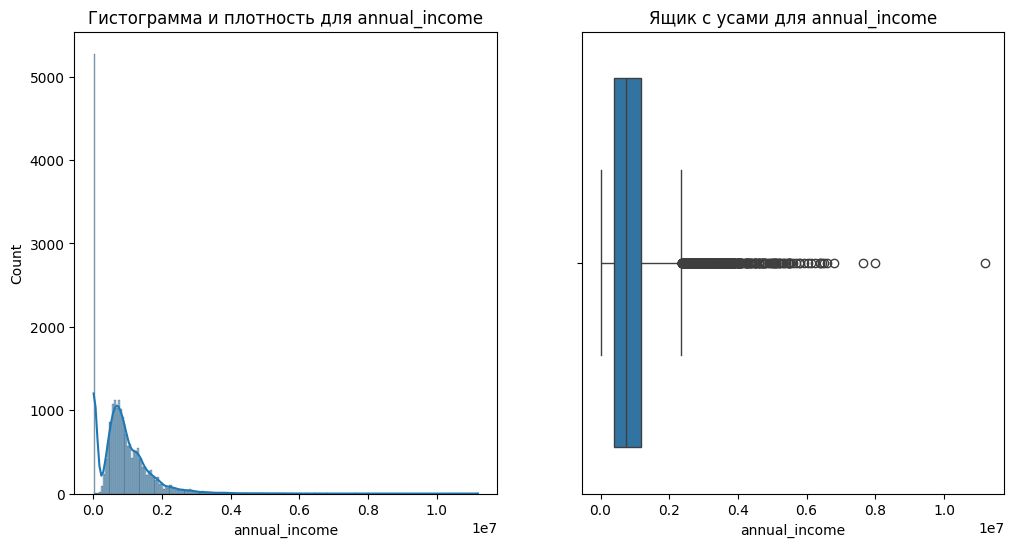

Количество выбросов для annual_income: 821


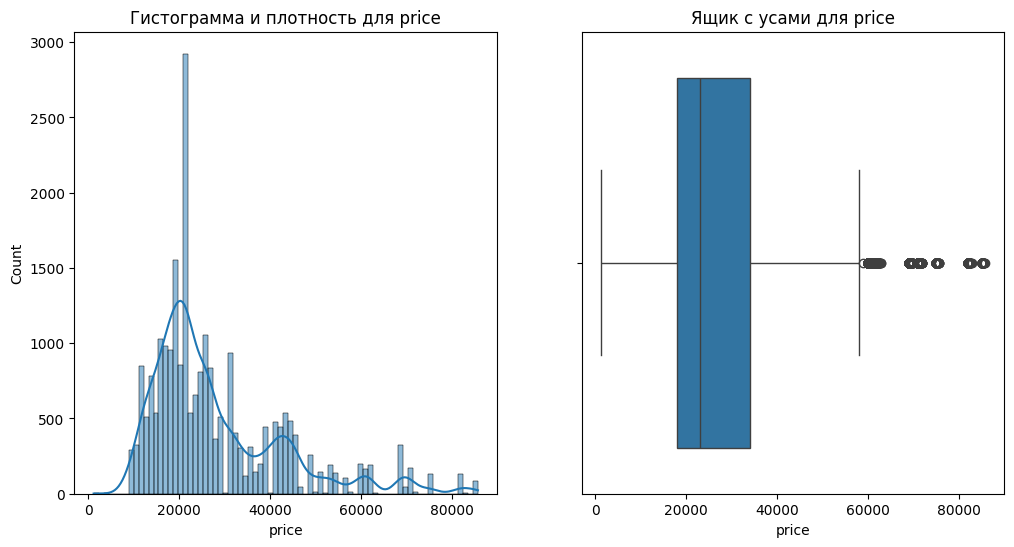

Количество выбросов для price: 1449


In [8]:
# Лабораторная работа №2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for feature in number_feature_names:
    plt.figure(figsize=(12, 6))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(features[feature], kde=True)
    plt.title(f'Гистограмма и плотность для {feature}')

    # Диаграмма "ящик с усами"
    plt.subplot(1, 2, 2)
    sns.boxplot(x=features[feature])
    plt.title(f'Ящик с усами для {feature}')
    
    plt.show()

    # Проверка на выбросы
    Q1 = features[feature].quantile(0.25)
    Q3 = features[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = features[(features[feature] < lower_bound) | (features[feature] > upper_bound)]
    print(f'Количество выбросов для {feature}: {outliers.shape[0]}')

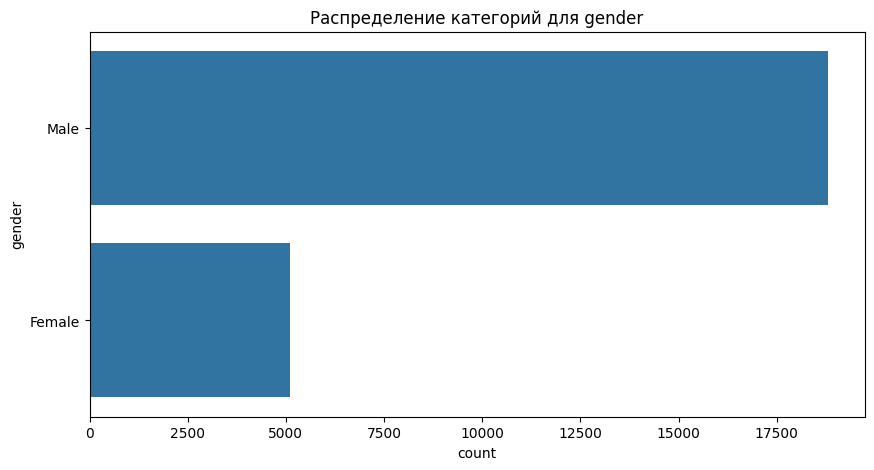

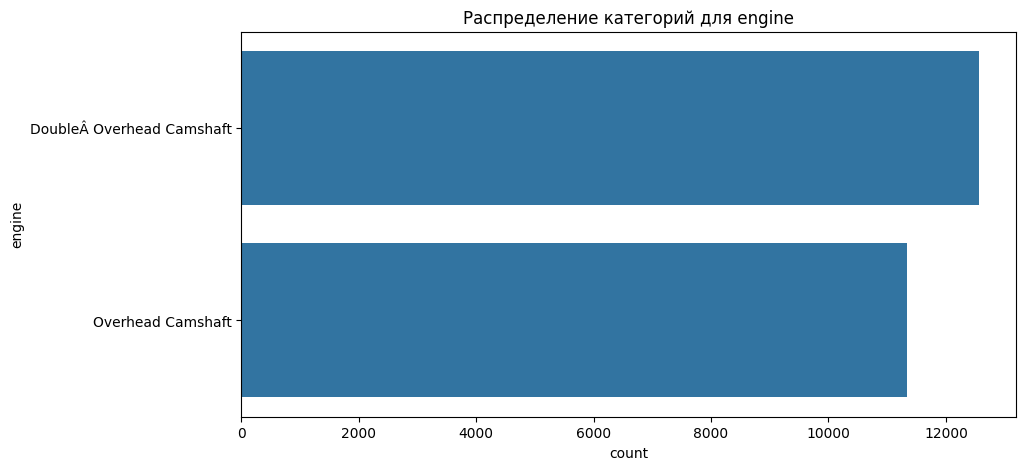

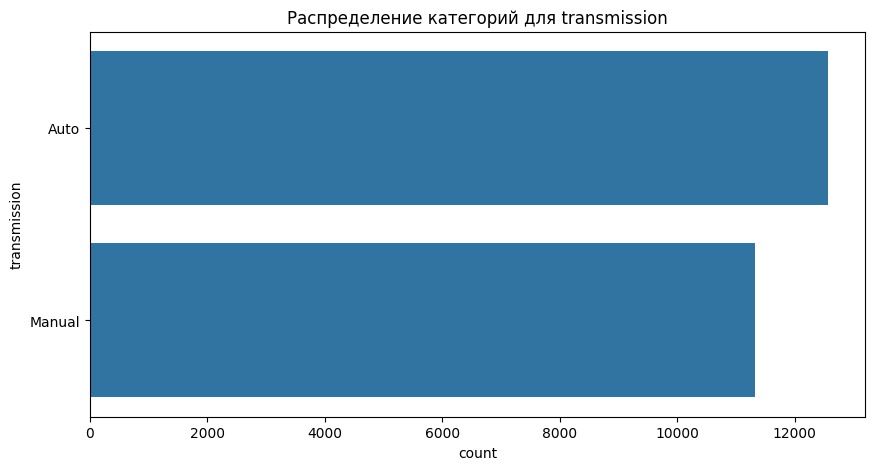

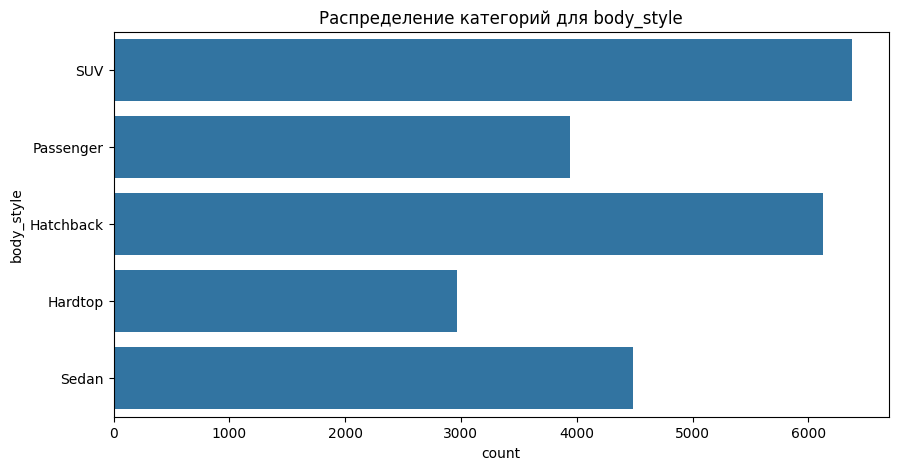

In [9]:
for feature in category_fuature_names:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[feature])
    plt.title(f'Распределение категорий для {feature}')
    plt.show()

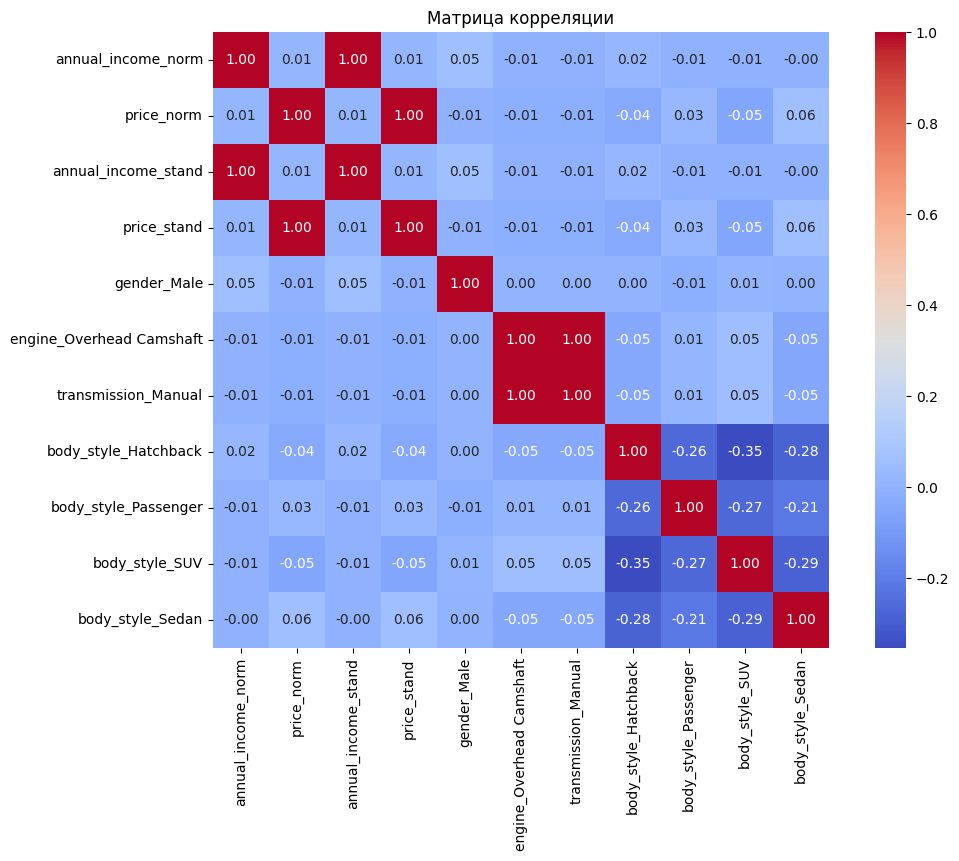

Series([], dtype: float64)


In [10]:
encoded_features = pd.concat([minmax_values_df, standard_values_df, encoded_values_df], axis=1)

plt.figure(figsize=(12, 8))
correlation_matrix = encoded_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

high_correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs.between(0.25, 0.99)]
print(high_correlation_pairs)

for (feature1, feature2) in high_correlation_pairs.index:
    if feature1 != feature2:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=encoded_features[feature1], y=encoded_features[feature2])
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'Диаграмма рассеяния: {feature1} vs {feature2}')
        plt.show()

In [11]:
# Лабораторная работа №3
target = 'gender_Male'
clear_features = [
    target,
    'price_stand',
    'annual_income_stand']

#q_low = encoded_features[target+ '_norm'].quantile(0.25)
#q_hi = encoded_features[target + '_norm'].quantile(0.75)
#q_range = q_hi - q_low
#encoded_features = encoded_features[(encoded_features[target + '_norm'] < q_hi + 1.5 * q_range) & (encoded_features['annual_income_norm'] > q_low - 1.5 * q_range)]

#x = encoded_features.drop(columns=[target + '_norm', target + '_stand', 'price_stand'])
#y = pd.cut(encoded_features[target + '_norm'], bins=3, labels=['cheap', 'medium', 'expensive'])
x = encoded_features.drop(columns=clear_features)
y = encoded_features[target]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

all_features_accuracy_score = accuracy_score(y_test, y_pred)

print("Оценка модели до снижения размерности:", all_features_accuracy_score)
print(classification_report(y_test, y_pred))
print('Всего образцов: %d ' % len(y_test))
print('Чиcлo ошибочно классифицированных образцов:  %d' % (y_test != y_pred).sum())

Оценка модели до снижения размерности: 0.746705710102489
              precision    recall  f1-score   support

         0.0       0.26      0.08      0.12      1050
         1.0       0.78      0.93      0.85      3731

    accuracy                           0.75      4781
   macro avg       0.52      0.51      0.49      4781
weighted avg       0.67      0.75      0.69      4781

Всего образцов: 4781 
Чиcлo ошибочно классифицированных образцов:  1211


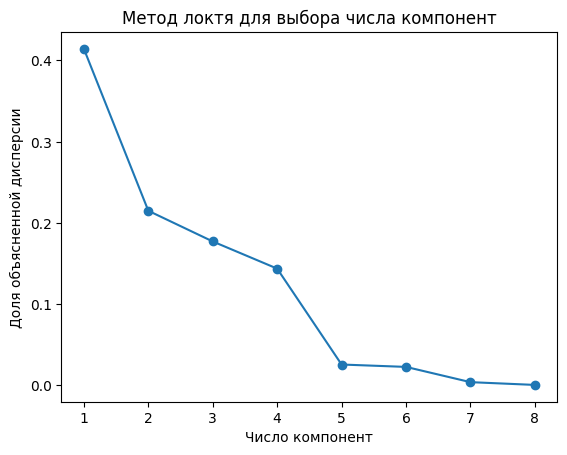

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
x_reduced = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Число компонент")
plt.ylabel("Доля объясненной дисперсии")
plt.title("Метод локтя для выбора числа компонент")
plt.show()

In [14]:
pca = PCA(n_components=5)
x_reduced = pca.fit_transform(x)

x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

knn_reduced = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_reduced.fit(x_train_reduced, y_train_reduced)

y_pred_reduced = knn_reduced.predict(x_test_reduced)
reduced_features_accuracy_score = accuracy_score(y_test_reduced, y_pred_reduced)

print("Оценка модели после снижения размерности:", reduced_features_accuracy_score)
print(classification_report(y_test_reduced, y_pred_reduced))
print('Всего образцов: %d ' % len(y_test))
print('Чиcлo ошибочно классифицированных образцов:  %d' % (y_test_reduced != y_pred_reduced).sum())

Оценка модели после снижения размерности: 0.7456599037858188
              precision    recall  f1-score   support

         0.0       0.25      0.08      0.12      1050
         1.0       0.78      0.93      0.85      3731

    accuracy                           0.75      4781
   macro avg       0.51      0.51      0.48      4781
weighted avg       0.66      0.75      0.69      4781

Всего образцов: 4781 
Чиcлo ошибочно классифицированных образцов:  1216


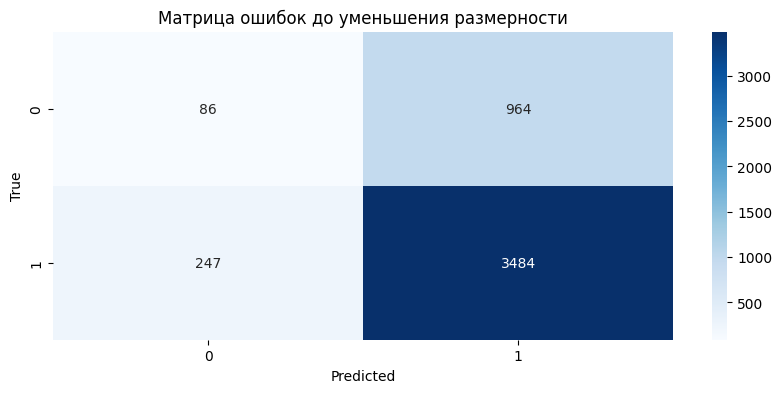

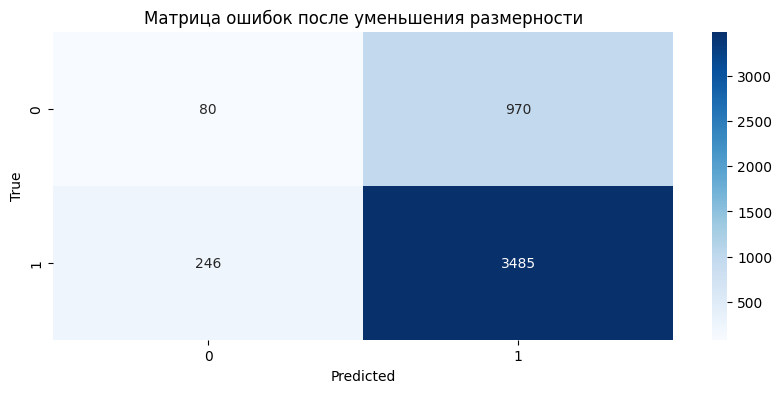

In [15]:
plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок до уменьшения размерности')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test_reduced, y_pred_reduced), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок после уменьшения размерности')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
from sklearn.feature_selection import f_classif

F, p = f_classif(x, y)
feature_importance = pd.DataFrame({'Feature': x.columns, 'F-value': F, 'p-value': p})

feature_importance

,Feature,F-value,p-value
0,annual_income_norm,70.449529,4.980295e-17
1,price_norm,1.046747,3.062679e-01
2,engine_Overhead Camshaft,0.170124,6.800052e-01
3,transmission_Manual,0.170124,6.800052e-01
4,body_style_Hatchback,0.170487,6.796834e-01
5,body_style_Passenger,2.896222,8.880043e-02
6,body_style_SUV,0.927519,3.355183e-01
7,body_style_Sedan,0.319611,5.718469e-01


annual_income_norm          float64
price_norm                  float64
engine_Overhead Camshaft    float64
transmission_Manual         float64
body_style_Hatchback        float64
body_style_Passenger        float64
body_style_SUV              float64
body_style_Sedan            float64
dtype: object


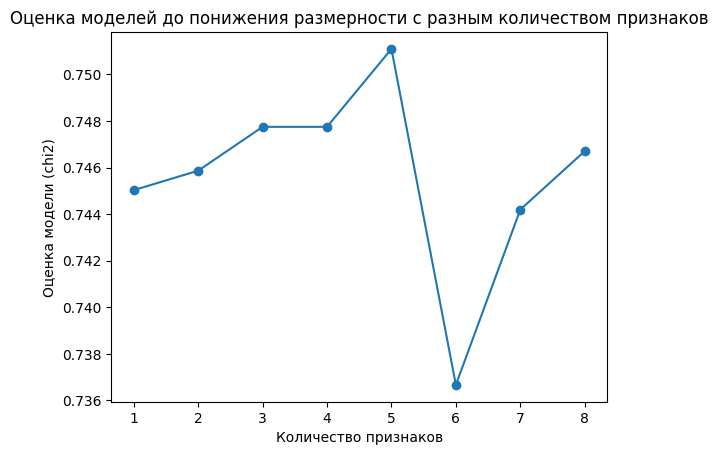

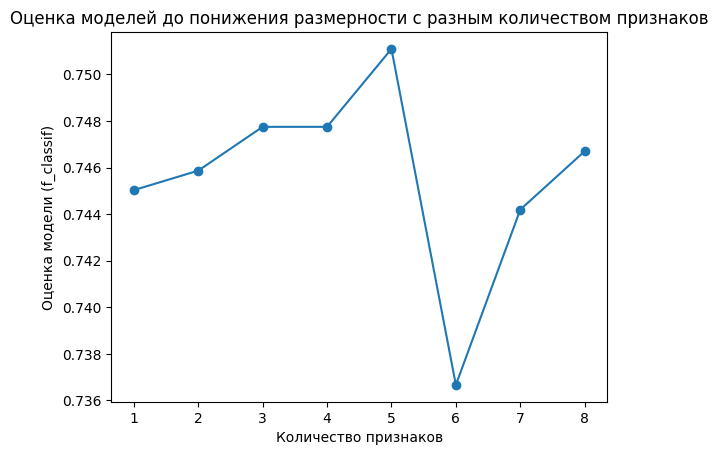

In [17]:
# Лабораторная работа №4
from sklearn.feature_selection import SelectKBest, chi2

print(x.dtypes)

score_funcs = [ ('chi2', chi2), ('f_classif', f_classif) ]

kbest_fclassif_accuracy_score = -1.0
kbest_chi2_accuracy_score = -1.0

for key, func in score_funcs:
    accuracies = []
    for k in range(1, x.shape[1] + 1):
        selector = SelectKBest(score_func=func, k=k)
        x_train_selected = selector.fit_transform(x_train, y_train)
        x_test_selected = selector.transform(x_test)
    
        knn_selected = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
        knn_selected.fit(x_train_selected, y_train)
        
        y_pred_selected = knn_selected.predict(x_test_selected)
        accuracy_selected = accuracy_score(y_test, y_pred_selected)
        accuracies.append(accuracy_selected)

    if key == 'chi2':
        kbest_chi2_accuracy_score = max(accuracies)
    else:
        kbest_fclassif_accuracy_score = max(accuracies)
    plt.plot(range(1, x.shape[1] + 1), accuracies, marker='o')
    plt.title('Оценка моделей до понижения размерности с разным количеством признаков')
    plt.xlabel('Количество признаков')
    plt.ylabel(f'Оценка модели ({key})')
    plt.show()

{'AllFeatures': 0.746705710102489, 'PCA': 0.7456599037858188, 'Select_KBest (f_classif)': 0.7510980966325037, 'Select_KBest (chi2)': 0.7510980966325037}


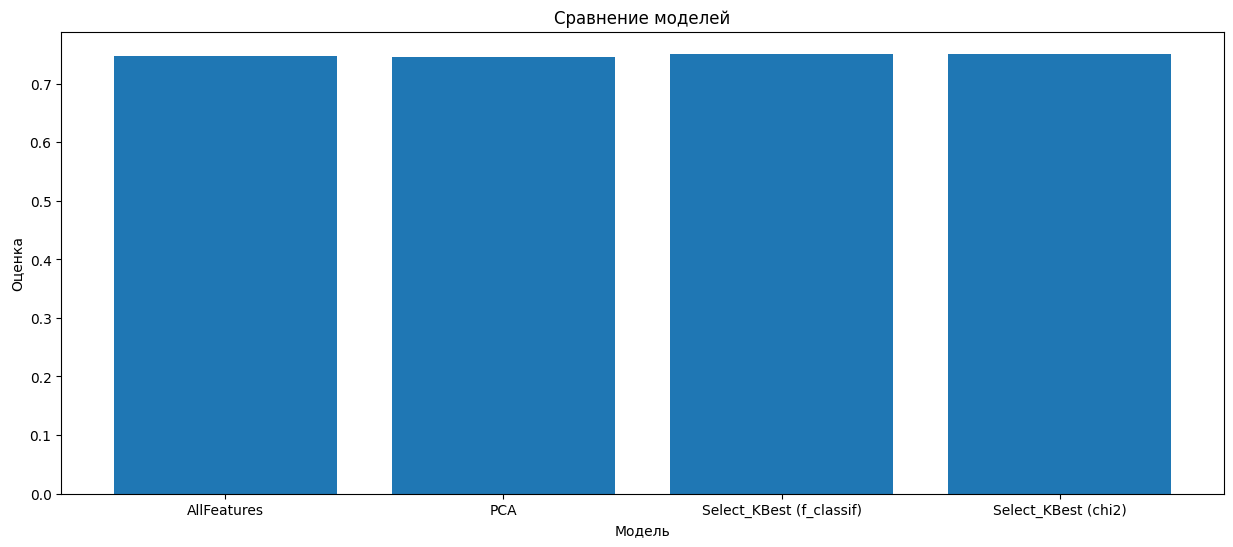

In [18]:
all_accuracies = {
    'AllFeatures': all_features_accuracy_score,
    'PCA': reduced_features_accuracy_score,
    'Select_KBest (f_classif)': kbest_fclassif_accuracy_score,
    'Select_KBest (chi2)': kbest_chi2_accuracy_score
}

print(all_accuracies)

plt.figure(figsize=(15,6))
plt.bar(all_accuracies.keys(), all_accuracies.values())
plt.title('Сравнение моделей')
plt.xlabel('Модель')
plt.ylabel('Оценка')
plt.show()

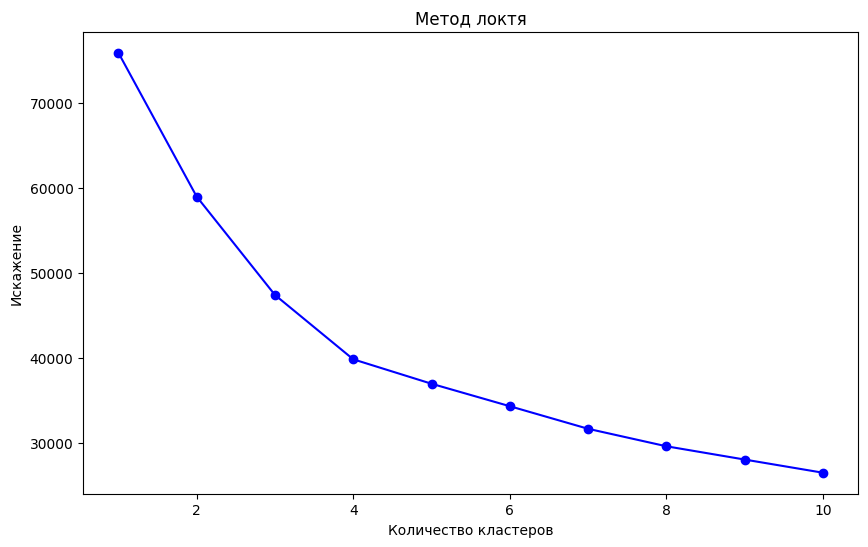

In [19]:
# Лабораторная работа №5
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

target = 'gender_Male'
clear_features = [
    target,
    'price_norm',
    'annual_income_norm']

x = encoded_features.drop(columns=clear_features)
y = encoded_features[target]

distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя')
plt.show()

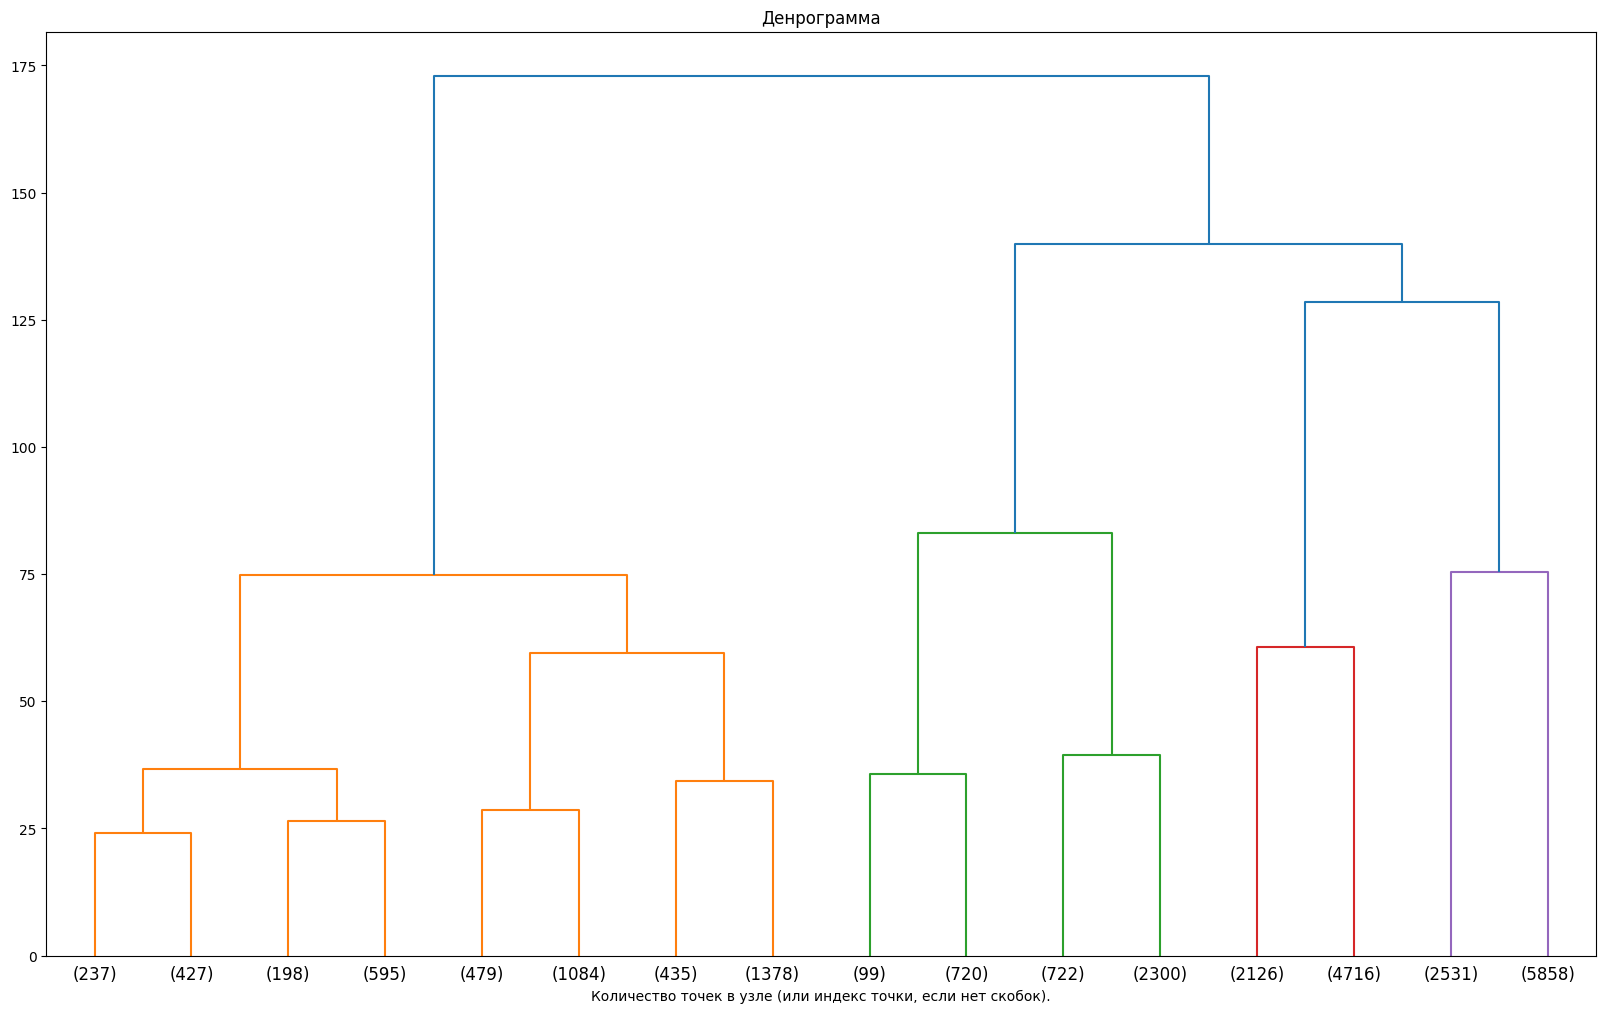

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def dendrogram_plot(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(20,12))
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(x)
plt.title('Денрограмма')
dendrogram_plot(model, truncate_mode='level', p=3)
plt.xlabel('Количество точек в узле (или индекс точки, если нет скобок).')
plt.show()

In [21]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

dbscan = DBSCAN(eps=0.51, min_samples=20).fit(x)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Предпологаемое количество кластеров: %d" % n_clusters)
print("Примерное количество точек шума: %d" % n_noise)
print("Однородность: %0.6f" % metrics.homogeneity_score(y, labels))
print("Полнота: %0.6f" % metrics.completeness_score(y, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(y, labels))
print("Скорректированный индекс Rand: %0.6f" % metrics.adjusted_rand_score(y, labels))
print("Скорректированная взаимная информация: %0.6f" % metrics.adjusted_mutual_info_score(y, labels))
print("Коэффицент силуэта: %0.6f" % metrics.silhouette_score(x, labels))

Предпологаемое количество кластеров: 19
Примерное количество точек шума: 610
Однородность: 0.001329
Полнота: 0.000282
V-measure: 0.000465
Скорректированный индекс Rand: 0.000407
Скорректированная взаимная информация: 0.000195
Коэффицент силуэта: 0.201066


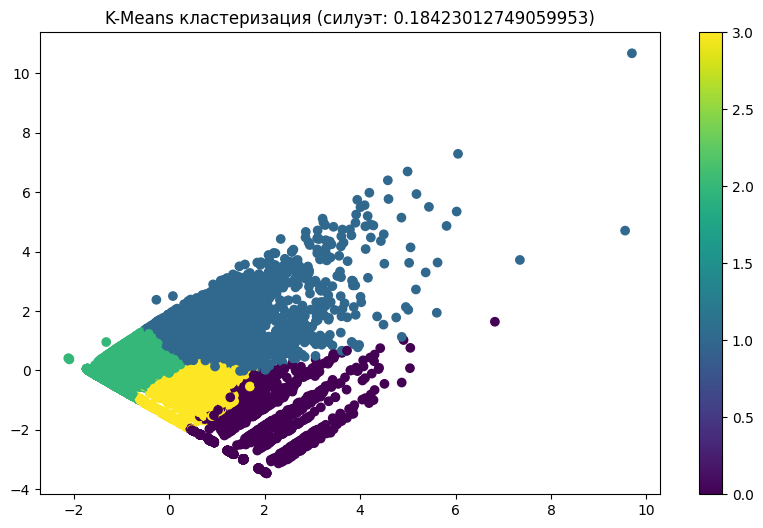

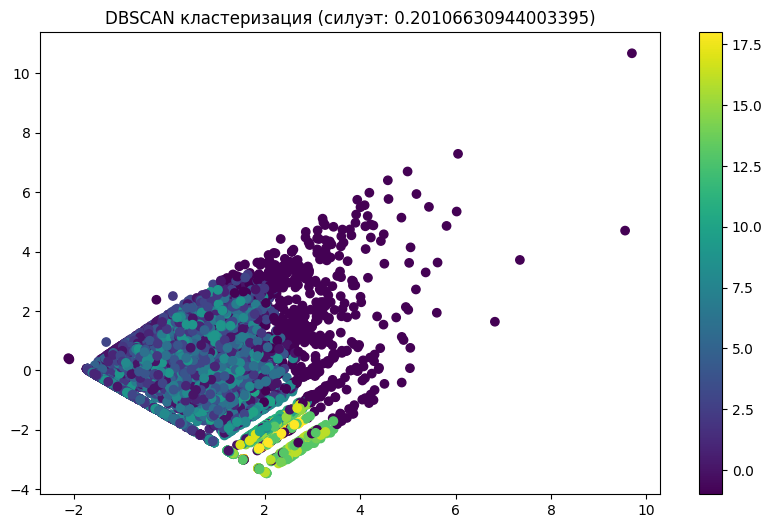

In [22]:
#PCA
kmeans_clusters = KMeans(n_clusters=4).fit_predict(x)
kmeans_score = silhouette_score(x, kmeans_clusters)

dbscan_clusters = DBSCAN(eps=0.51, min_samples=20).fit_predict(x)
dbscan_score = silhouette_score(x, dbscan_clusters)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_clusters)
plt.title(f'K-Means кластеризация (силуэт: {kmeans_score})')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=dbscan_clusters)
plt.title(f'DBSCAN кластеризация (силуэт: {dbscan_score})')
plt.colorbar()
plt.show()

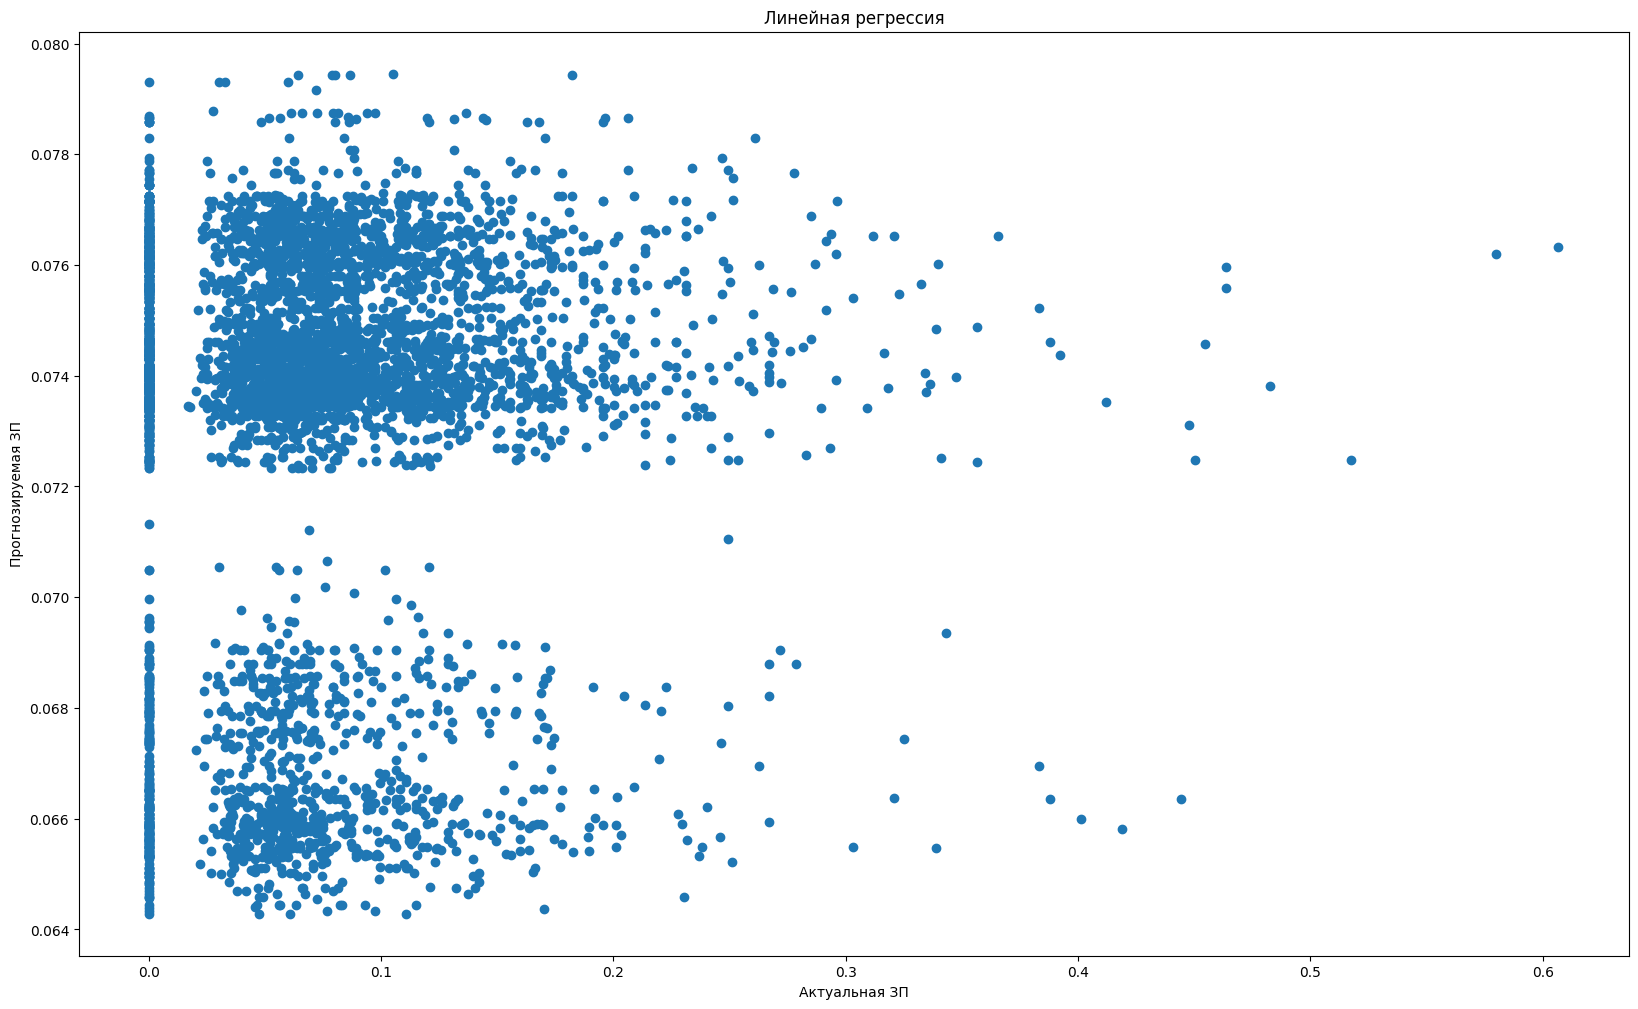

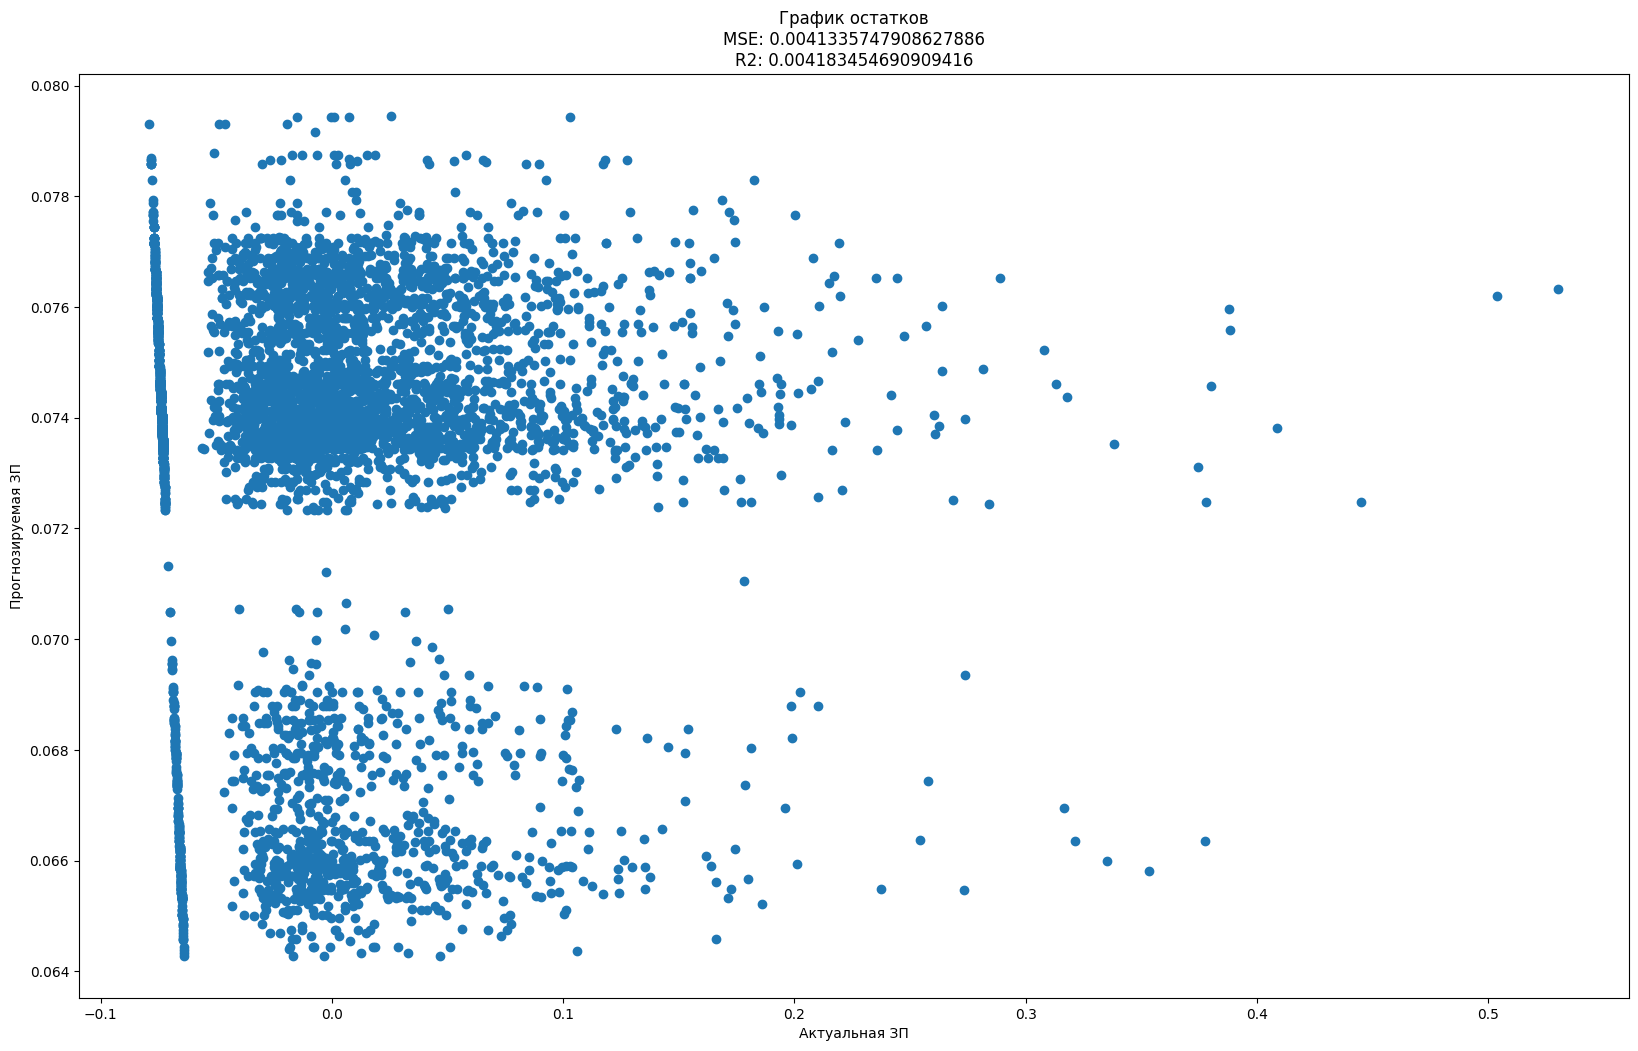

In [23]:
# Лабораторная работа №6
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target = 'annual_income_norm'
clear_features = [
    target,
    'annual_income_stand',
    'price_stand']

x = encoded_features.drop(columns=clear_features)
y = encoded_features[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred)
plt.xlabel("Актуальная ЗП")
plt.ylabel("Прогнозируемая ЗП")
plt.title("Линейная регрессия")
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(20,12))
plt.scatter(y_test - y_pred, y_pred)
plt.xlabel("Актуальная ЗП")
plt.ylabel("Прогнозируемая ЗП")
plt.title(f"График остатков\nMSE: {mse}\nR2: {r2}")
plt.show()

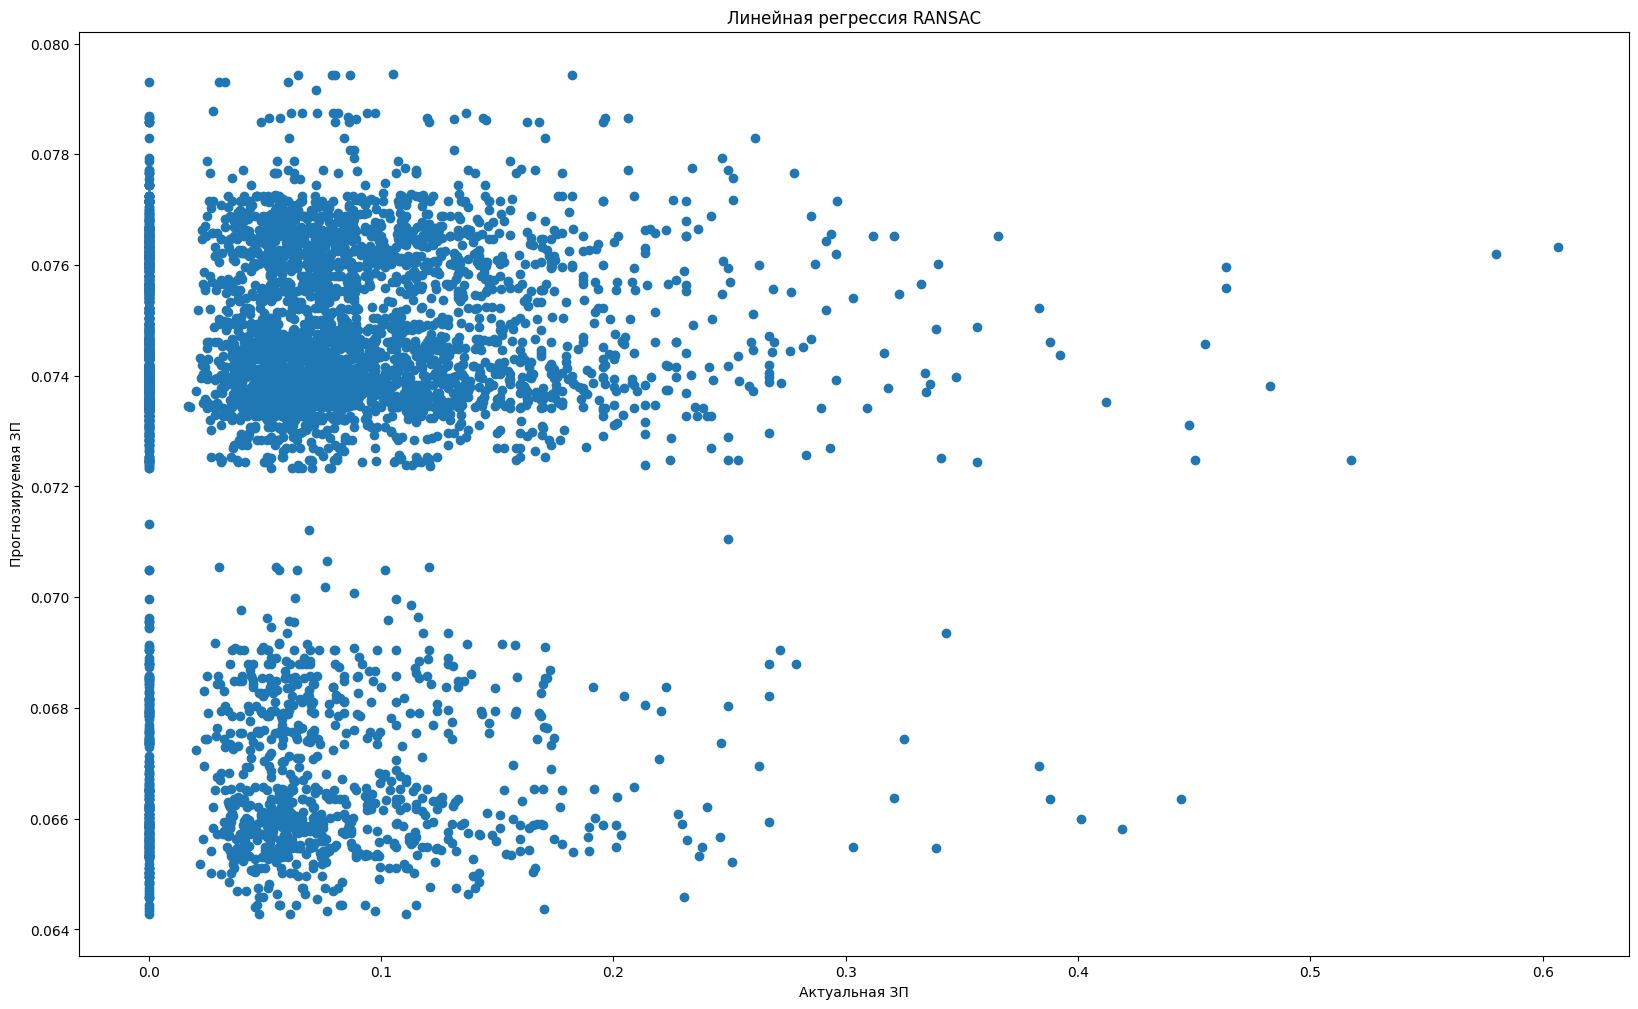

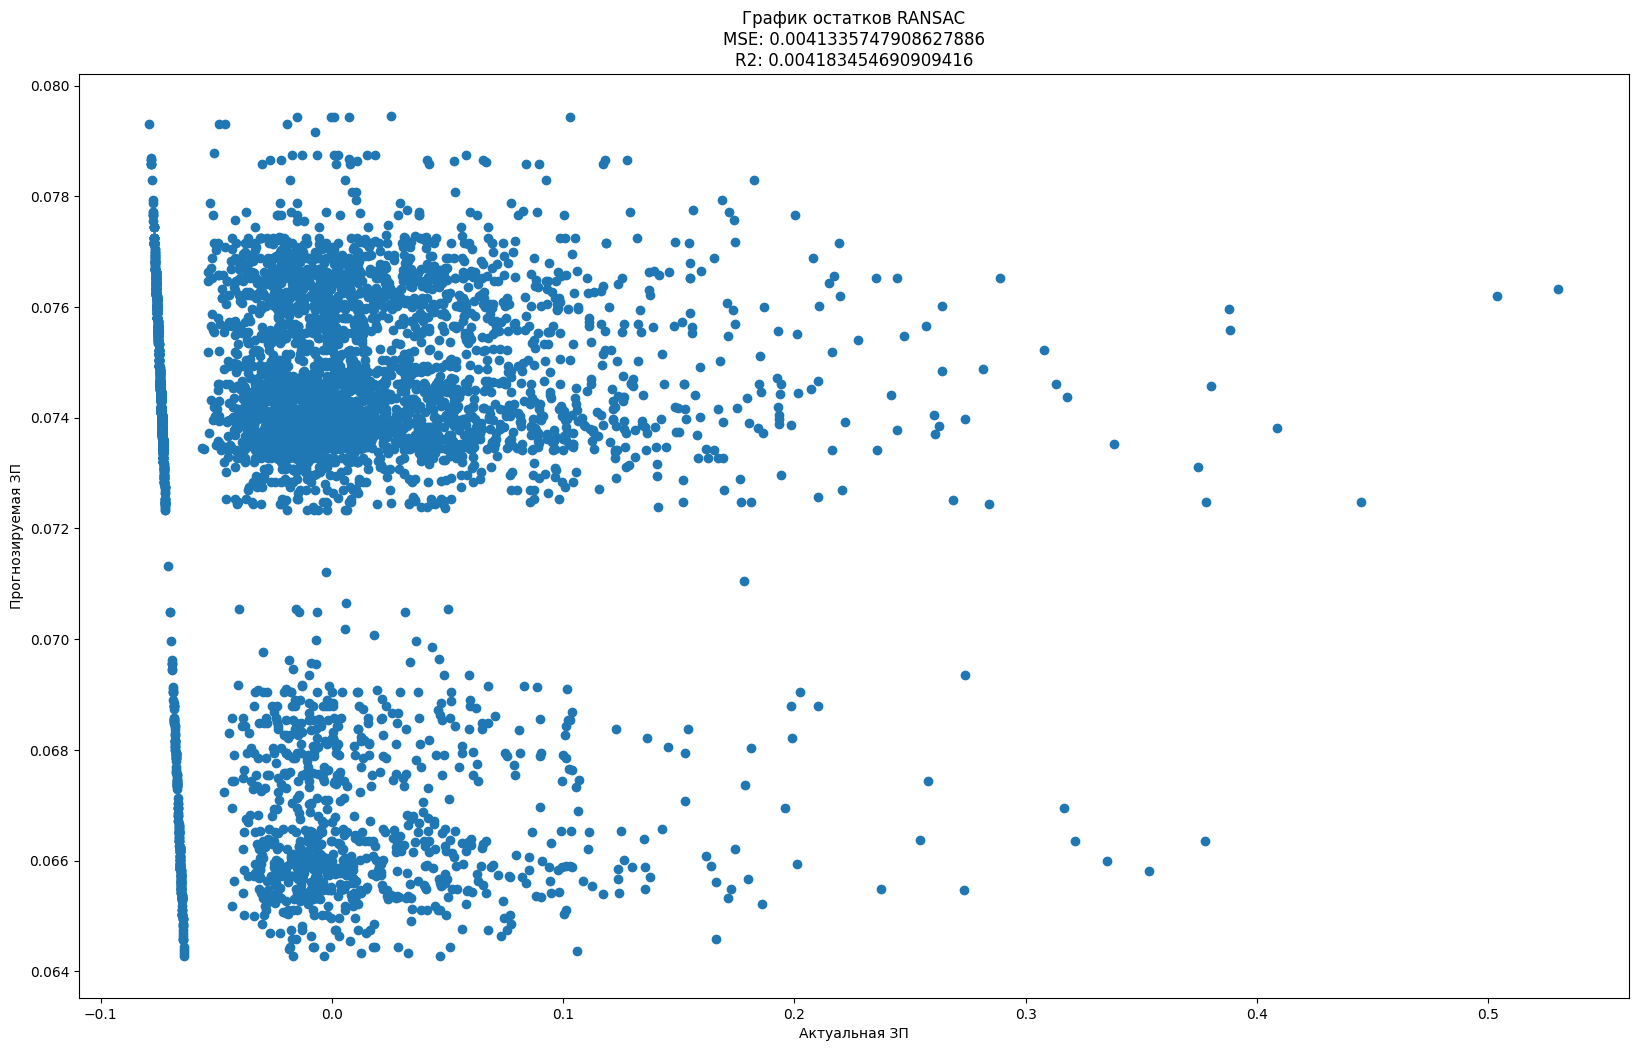

In [24]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(LinearRegression(), min_samples=50, residual_threshold=5.0, random_state=42)

model.fit(x_train, y_train)
y_pred_ransac = model.predict(x_test)

plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred_ransac)
plt.xlabel("Актуальная ЗП")
plt.ylabel("Прогнозируемая ЗП")
plt.title("Линейная регрессия RANSAC")
plt.show()

mse = mean_squared_error(y_test, y_pred_ransac)
r2 = r2_score(y_test, y_pred_ransac)

plt.figure(figsize=(20,12))
plt.scatter(y_test - y_pred_ransac, y_pred_ransac)
plt.xlabel("Актуальная ЗП")
plt.ylabel("Прогнозируемая ЗП")
plt.title(f"График остатков RANSAC\nMSE: {mse}\nR2: {r2}")
plt.show()

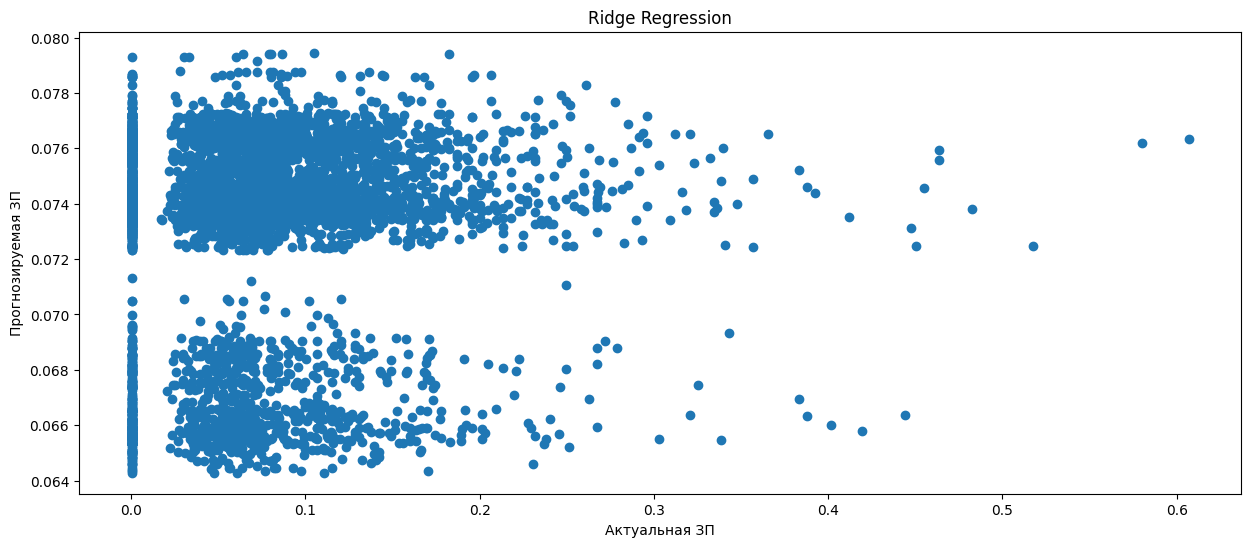

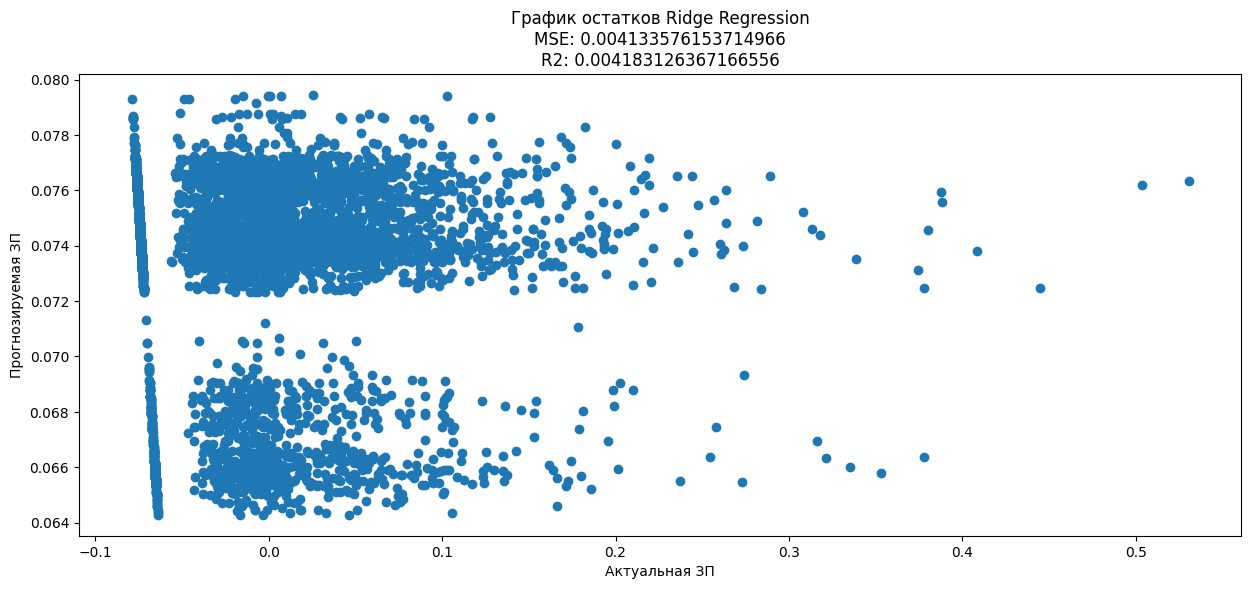

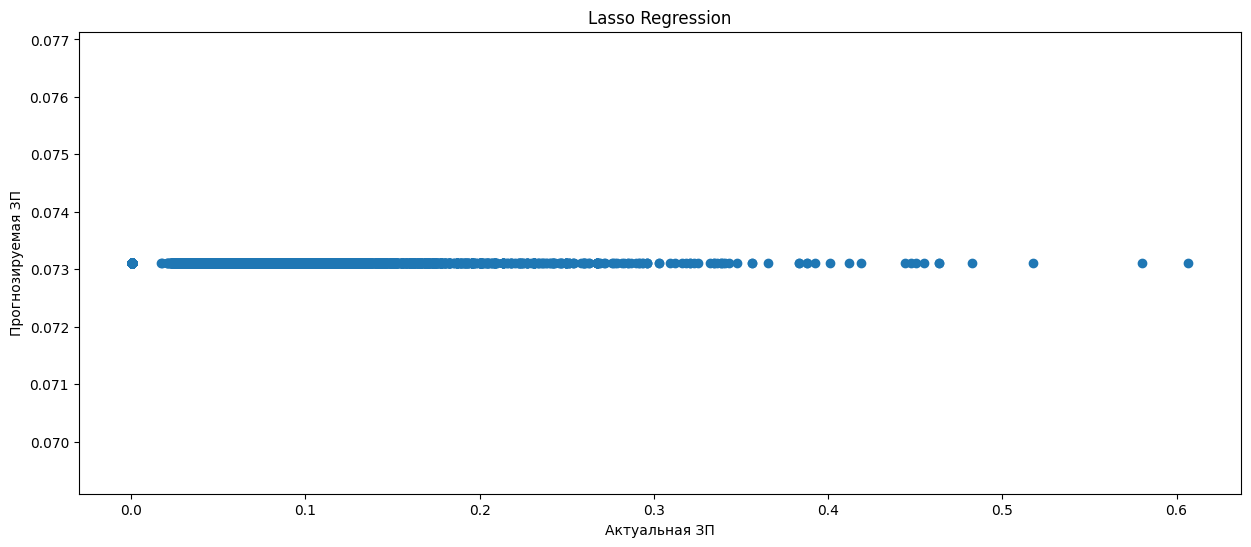

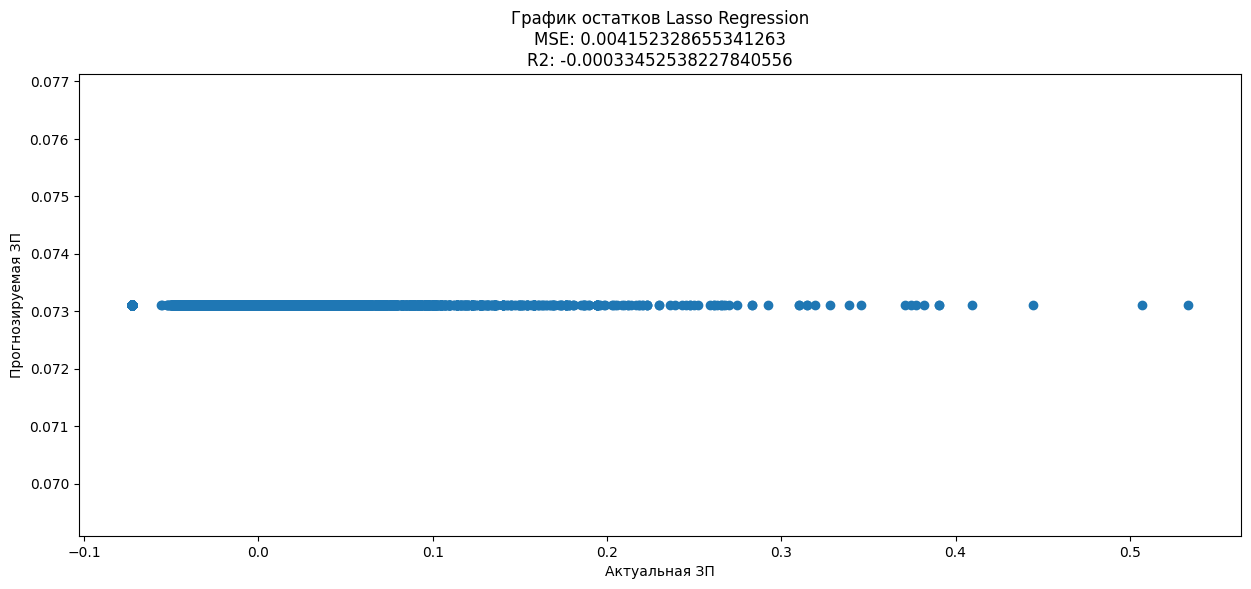

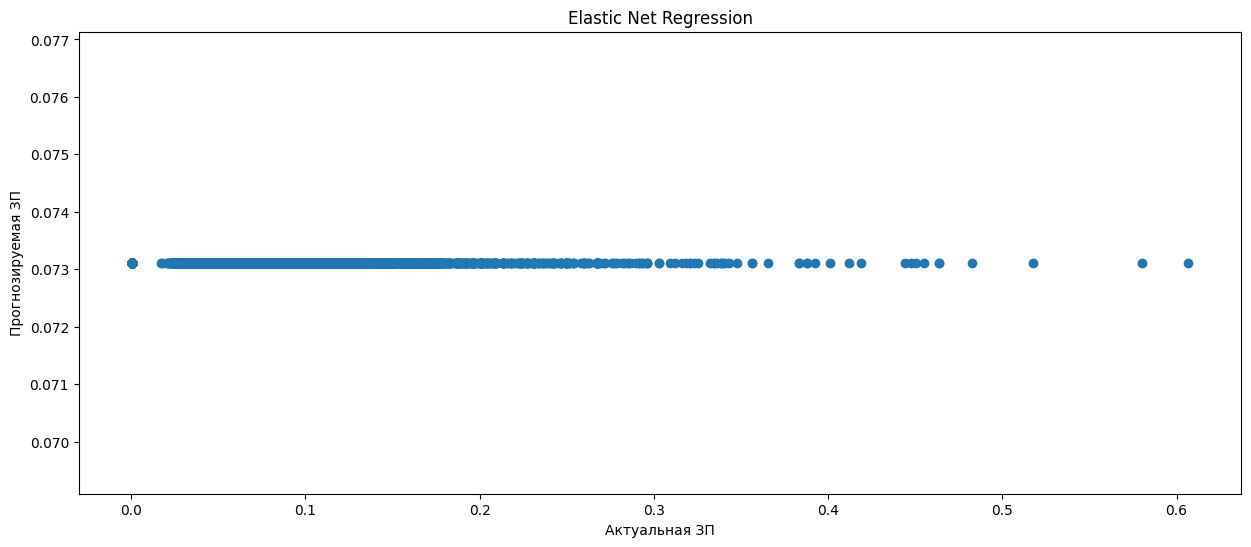

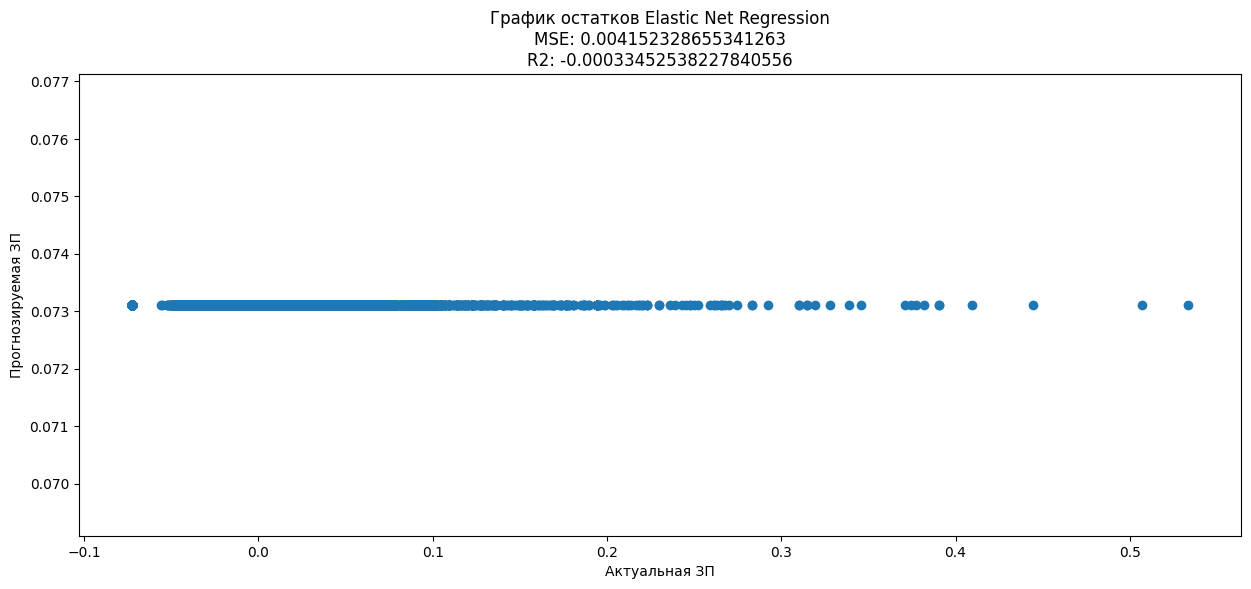

Ridge Regression Coefficients: [ 0.00436866  0.00809668 -0.00031642 -0.00031642  0.00233026 -0.00076948
  0.00010781 -0.00018876]
Lasso Regression Coefficients: [ 0.  0. -0. -0.  0. -0. -0. -0.]
Elastic Net Regression Coefficients: [ 0.  0. -0. -0.  0. -0. -0. -0.]


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

models = {
    'Ridge Regression': Ridge(alpha=0.5),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net Regression': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = y_pred
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    plt.figure(figsize=(15, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Актуальная ЗП")
    plt.ylabel("Прогнозируемая ЗП")
    plt.title(f'{name}')
    plt.show()

    plt.figure(figsize=(15, 6))
    plt.scatter(y_test - y_pred, y_pred)
    plt.xlabel("Актуальная ЗП")
    plt.ylabel("Прогнозируемая ЗП")
    plt.title(f"График остатков {name}\nMSE: {mse}\nR2: {r2}")
    plt.show()

for name, model in models.items():
    print(f"{name} Coefficients: {model.coef_}")

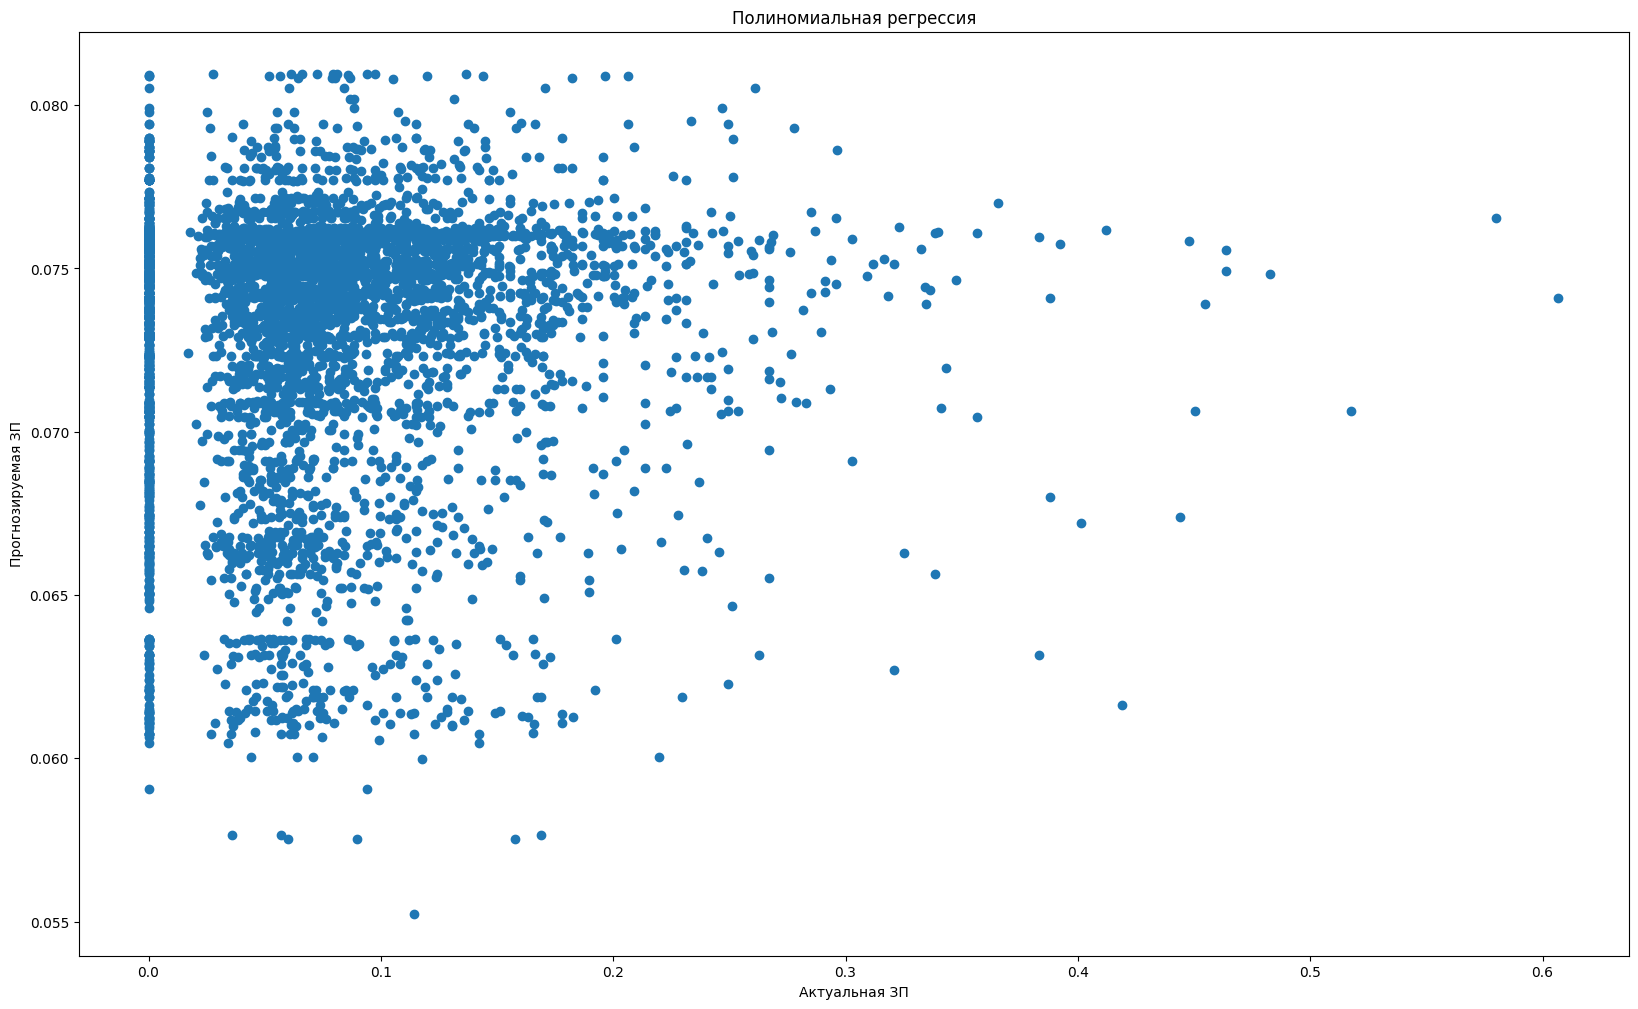

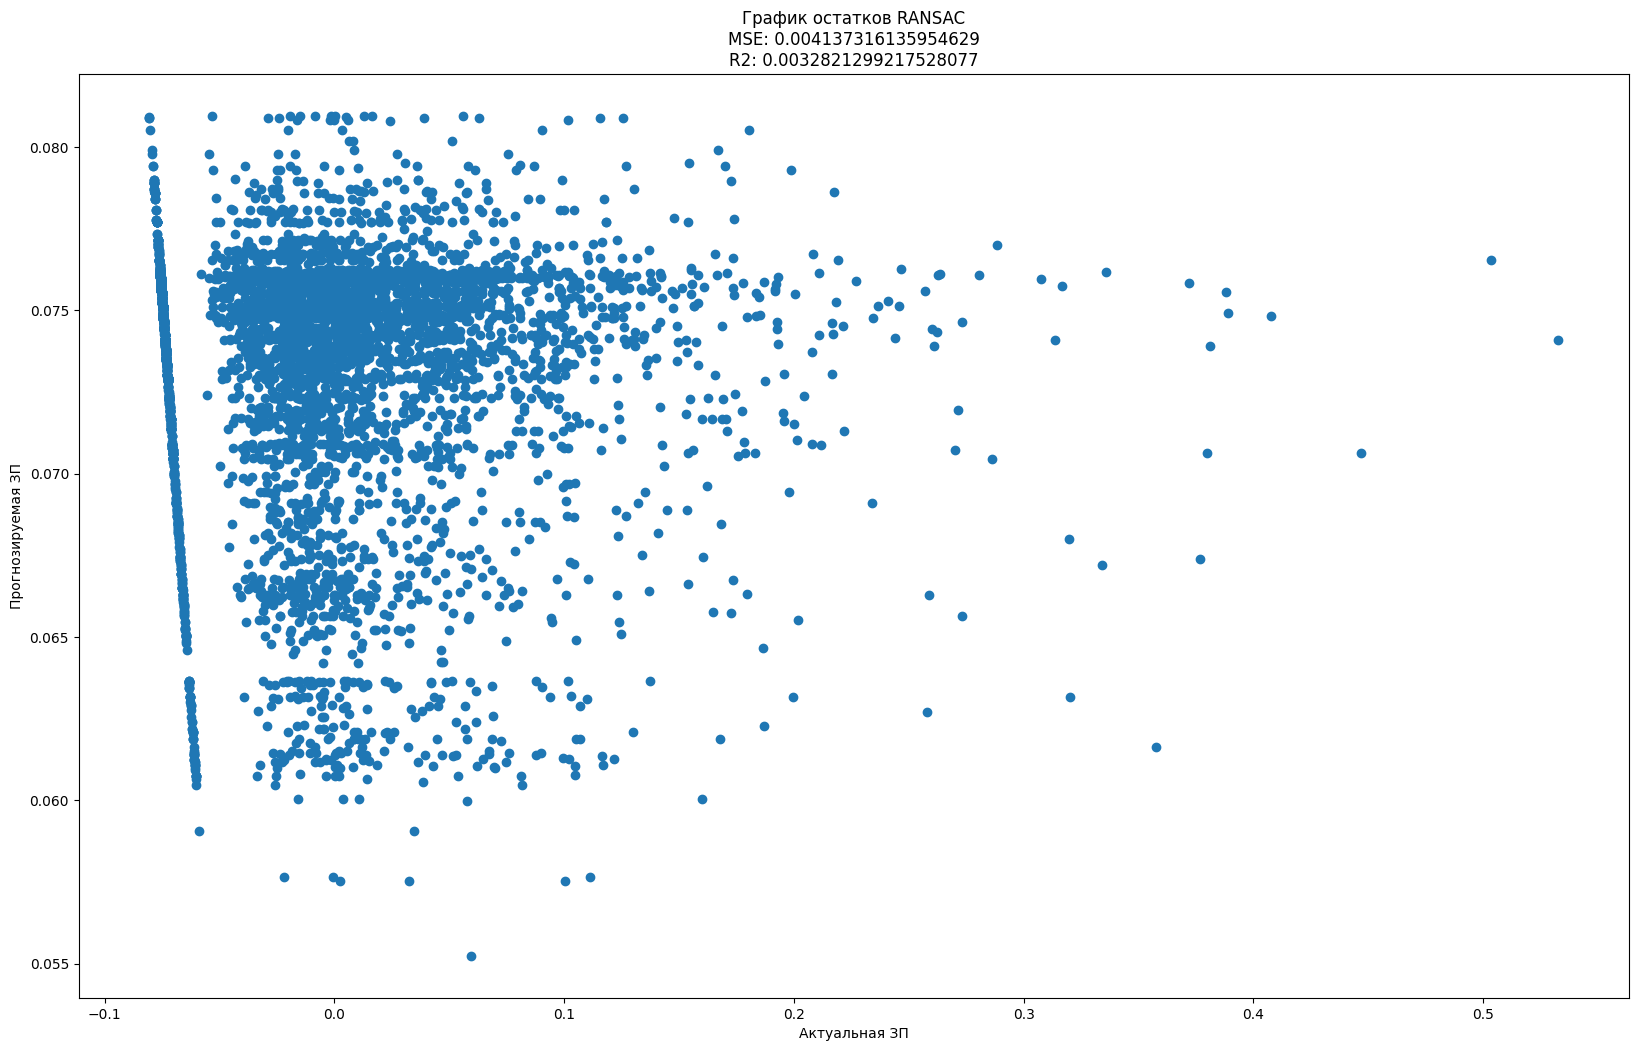

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)
model_poly = LinearRegression()
model_poly.fit(x_poly, y_train)
y_poly_pred = model_poly.predict(poly.transform(x_test))

plt.figure(figsize=(20,12))
plt.scatter(y_test, y_poly_pred)
plt.xlabel("Актуальная ЗП")
plt.ylabel("Прогнозируемая ЗП")
plt.title("Полиномиальная регрессия")
plt.show()

mse = mean_squared_error(y_test, y_poly_pred)
r2 = r2_score(y_test, y_poly_pred)

plt.figure(figsize=(20,12))
plt.scatter(y_test - y_poly_pred, y_poly_pred)
plt.xlabel("Актуальная ЗП")
plt.ylabel("Прогнозируемая ЗП")
plt.title(f"График остатков RANSAC\nMSE: {mse}\nR2: {r2}")
plt.show()

In [53]:
# Лабораторная работа №7
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC, LinearSVC

target = 'annual_income_stand'
clear_features = [
    target,
    'price_norm',
    'annual_income_norm']

x = encoded_features.drop(columns=clear_features)
y = pd.qcut(encoded_features[target], q=3, labels=[1, 2, 3])
#y = encoded_features[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

linear_svm = LinearSVC(multi_class='ovr')
linear_svm.fit(x_train, y_train)

perceptron = Perceptron()
perceptron.fit(x_train, y_train)

Perceptron()

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid_poly = {
    'degree': [2]
}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5)
svm_poly.fit(x_train, y_train)

print('done')

param_grid_rbf = {
    'gamma': [0.1]
}
svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5)
svm_rbf.fit(x_train, y_train)

print('done')

done
done



=== Logistic Regression ===
Accuracy: 0.3589
F1-score: 0.3248


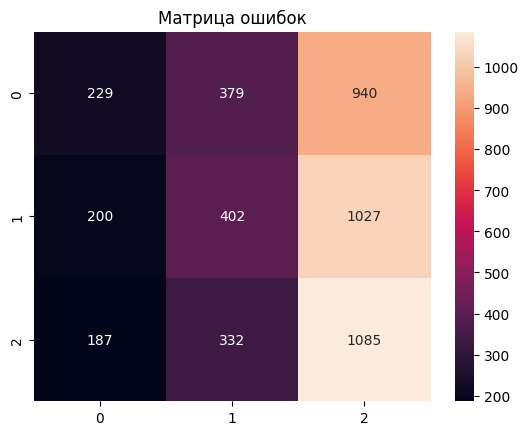


=== Linear SVM ===
Accuracy: 0.3585
F1-score: 0.3231


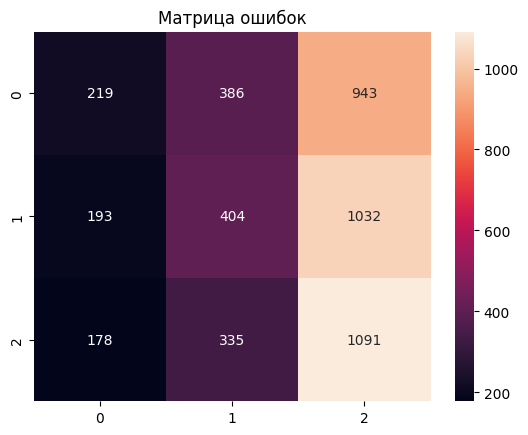


=== Perceptron ===
Accuracy: 0.3353
F1-score: 0.3232


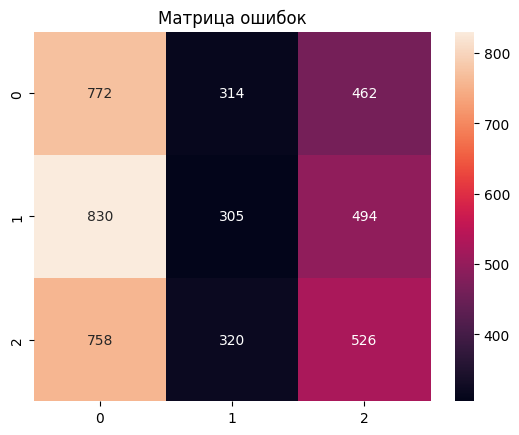


=== SVM Poly ===
Accuracy: 0.3524
F1-score: 0.3135


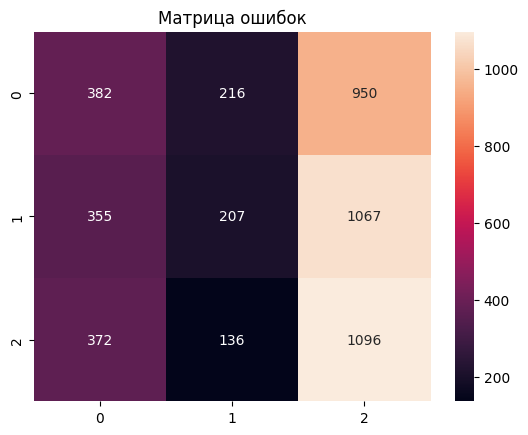


=== SVM RBF ===
Accuracy: 0.3577
F1-score: 0.2953


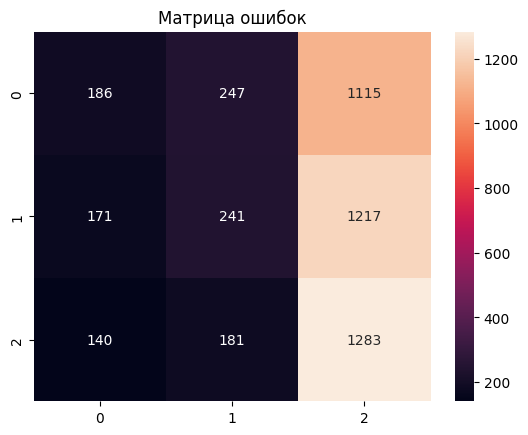

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    #y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    #roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    #print(f"ROC AUC: {roc_auc:.4f}")
    
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Матрица ошибок')
    plt.show()
    
    #fpr, tpr, _ = roc_curve(y_test, y_proba)
    #plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], 'k--')
    #plt.xlabel('Ложно положительный показатель')
    #plt.ylabel('Истинно положительный показатель')
    #plt.title('ROC Curve')
    #plt.legend()
    #plt.show()

models = {
    "Logistic Regression": log_reg,
    "Linear SVM": linear_svm,
    "Perceptron": perceptron,
    "SVM Poly": svm_poly.best_estimator_,
    "SVM RBF": svm_rbf.best_estimator_
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    evaluate_model(model, x_test, y_test)

                 Model  Accuracy  F1-score
0  Logistic Regression  0.358921  0.324795
1           Linear SVM  0.358502  0.323052
2           Perceptron  0.335286  0.323225
3             SVM Poly  0.352437  0.313476
4              SVM RBF  0.357666  0.295315


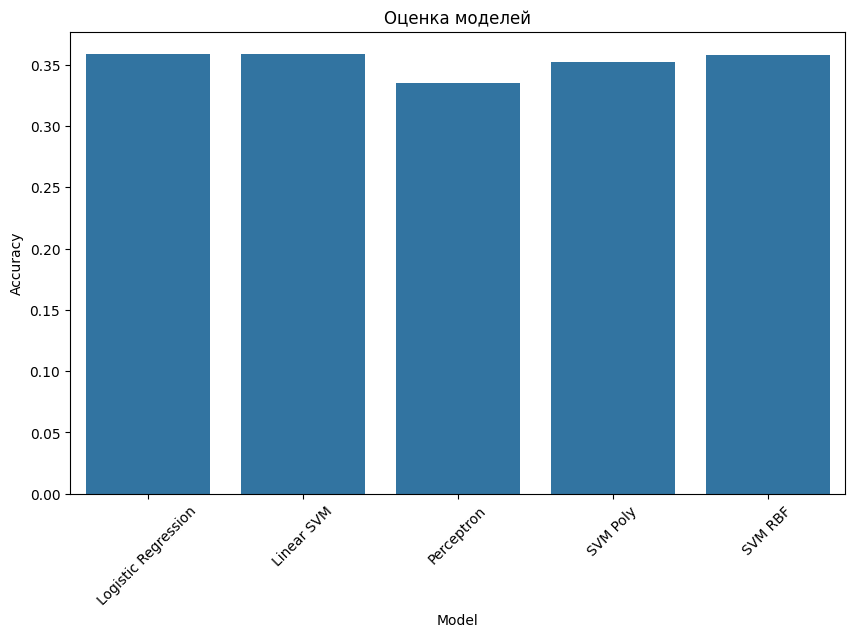

In [61]:
results = []
for name, model in models.items():
    y_pred = model.predict(x_test)
    #y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(x_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        #'ROC AUC': roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
print(results_df)

# Визуализация сравнения
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.title('Оценка моделей')
plt.xticks(rotation=45)
plt.show()